# CDO testing

This notebook runs the teleconnection diagnostics written with cdo python bindings

In [7]:
import sys

sys.path.insert(1, '/work/bb1153/b382289/AQUA/')
from aqua import Reader
sys.path.insert(1, '/work/bb1153/b382289/AQUA/diagnostics/teleconnections/')
from cdotesting import *
from tools import *
from plots import *

# Teleconnection config details
diagname  = 'teleconnections'
machine   = 'levante'

# Opening yml files
config   = load_config(machine,configdir='../../../config/')
namelist = load_namelist(diagname,configdir='../')

## NAO

In [9]:
# Configuration specific to the NAO teleconnection
telecname = 'NAO'
fieldname = namelist[telecname]['field']

# Configuring the reader
configdir = '../../../config/'

reader = Reader(model='ERA5', exp='era5', source='monthly_inst',
                configdir=configdir, var=fieldname,regrid='r200')

# Retrieving the data
data = reader.retrieve()
infile = data[fieldname]
infile = infile.sel(time=slice('1989-01-01','1995-12-01'))
infile = reader.regrid(infile)
infile = infile.to_netcdf('../data/nao_test.nc')

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='NAO index'>)

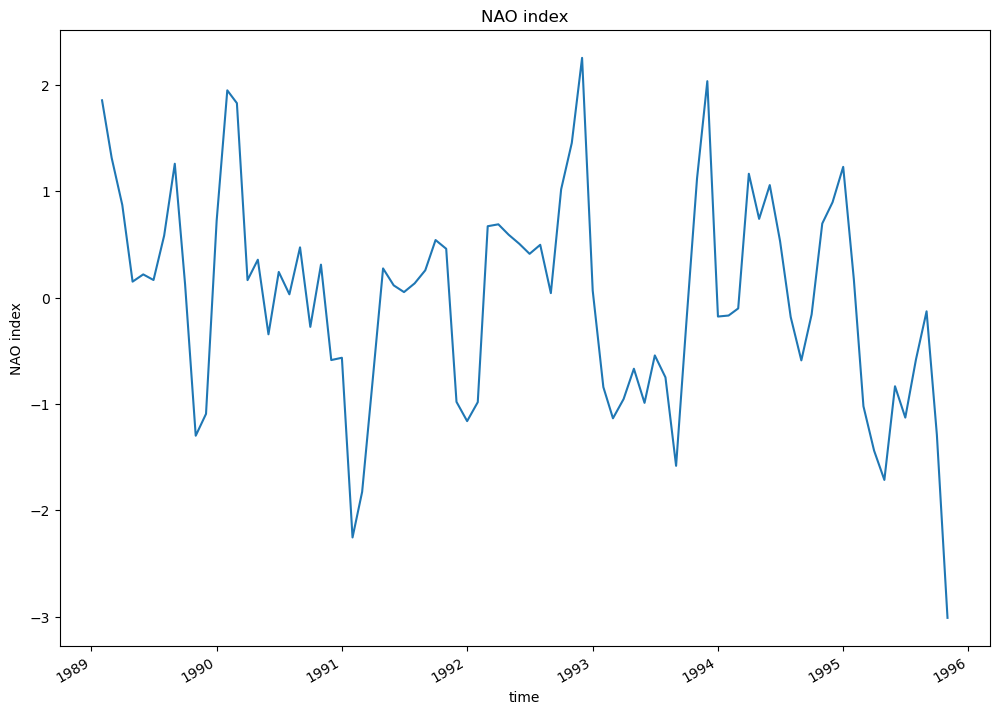

In [10]:
test = station_based_cdo('../data/nao_test.nc',namelist,telecname)
simple_plot(test['msl'],title='NAO index',xlabel='time',ylabel='NAO index')

## ENSO

In [11]:
# Configuration specific to the ENSO teleconnection
telecname = 'ENSO'
fieldname = namelist[telecname]['field']

reader = Reader(model='ERA5', exp='era5', source='monthly_inst',
                configdir=configdir, var=fieldname,regrid='r200')

# Retrieving the data
data = reader.retrieve()
infile = data[fieldname]
infile = infile.sel(time=slice('1989-01-01','1995-12-01'))
infile = reader.regrid(infile)
infile = infile.to_netcdf('../data/enso_test.nc')

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO index'}, xlabel='time', ylabel='Skin temperature [K]'>)

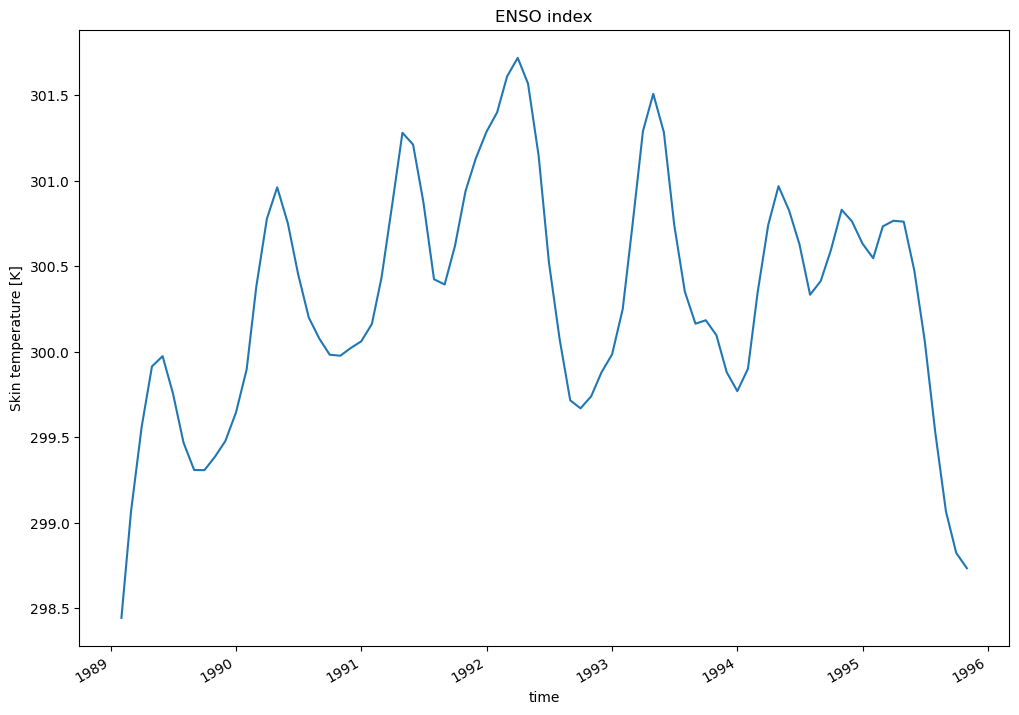

In [13]:
test = regional_mean_cdo('../data/enso_test.nc',namelist,telecname)
simple_plot(test[fieldname],title='ENSO index',xlabel='time')